In [1]:
# 📦 1. Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")


In [2]:
# 📥 2. Load Dataset
df = pd.read_csv('/kaggle/input/mobile-price-prediction/dataset.csv')
df.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
# 🧹 3. Check for Missing Values
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

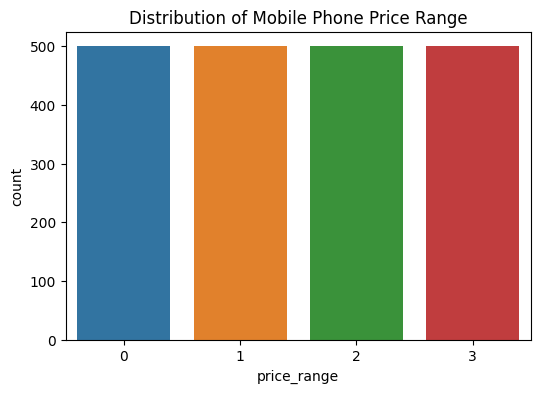

In [4]:
# 📊 4. Exploratory Data Analysis (Optional Visualization)
plt.figure(figsize=(6,4))
sns.countplot(x='price_range', data=df)
plt.title("Distribution of Mobile Phone Price Range")
plt.show()


In [5]:
# 🧪 5. Feature and Target Separation
X = df.drop('price_range', axis=1)
y = df['price_range']


In [6]:
# 📏 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# 📐 7. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
# 🤖 8. Model Training with Random Forest
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [9]:
# 🧾 9. Model Evaluation
y_pred = model.predict(X_test_scaled)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       0.89      0.86      0.87        91
           2       0.80      0.86      0.83        92
           3       0.93      0.88      0.91       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400

Confusion Matrix:
 [[101   4   0   0]
 [  6  78   7   0]
 [  0   6  79   7]
 [  0   0  13  99]]
Accuracy Score: 0.8925


In [12]:
# Sample query data (replace values as needed)
sample_data = pd.DataFrame([{
    'battery_power': 1500,
    'blue': 1,
    'clock_speed': 2.0,
    'dual_sim': 1,
    'fc': 5,
    'four_g': 1,
    'int_memory': 32,
    'm_dep': 0.6,  # ✅ Correct column name
    'mobile_wt': 150,
    'n_cores': 4,
    'pc': 12,
    'px_height': 800,
    'px_width': 1200,
    'ram': 2048,
    'sc_h': 14,
    'sc_w': 7,
    'talk_time': 10,
    'three_g': 1,
    'touch_screen': 1,
    'wifi': 1
}])

# Ensure same column order as training data
sample_data = sample_data[X.columns]  # `X` should be the features DataFrame used in training

# Apply same scaling as used during training
sample_scaled = scaler.transform(sample_data)

# Predict price range
prediction = model.predict(sample_scaled)

# Display the result
price_map = {0: "Low Cost", 1: "Medium Cost", 2: "High Cost", 3: "Very High Cost"}
print("📱 Predicted Price Range:", price_map[prediction[0]])


📱 Predicted Price Range: High Cost
